<a href="https://colab.research.google.com/github/VictoriaOlejarz/Chicago-Beaches/blob/main/chicago_beaches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Victoria Olejarz




Chicago Portal Datasets:

Beach Water Quality - Automated Sensors (https://data.cityofchicago.org/Parks-Recreation/Beach-Water-Quality-Automated-Sensors/qmqz-2xku/about_data)

Beach Weather Stations - Automated Sensors (https://data.cityofchicago.org/Parks-Recreation/Beach-Weather-Stations-Automated-Sensors/k7hf-8y75/about_data)

 The summer time in Chicago is one of the most amazing experiences. With the lake alongside the windy city, there are tons of beaches to go to and choose from. The nicest beaches are usually the ones with the clearest water and whitest sand. Since not every Chicago beach even has sand and a shore, I want to focus on the clarity of the water at each Chicago beach. During the summer time, I want to go to the beach that has the clearest water. A way to measure which beach has the clearest water is by looking at turbidity levels.


Proposal:
The Beach Water Quality Dataset gives data measurements from automated sensors in the lake at various beaches in Chicago. The factors in this dataset that I will be mainly focusing on are beach name, measurement timestamp, and turbidity. Turbidity is described as water having "the quality of being cloudy, opaque, or thick with suspended matter." (Oxford Dictionary). High turbidity makes water appear cloudy. In this dataset, turbidity is measured in Nephelometric Turbidity Units (NTU). According to datastream.org, "Turbidity values less than 10 NTU are considered low, a value of 50 NTU would be considered moderately turbid, and very high turbidity values can be more than 100 NTU."

Given this dataset, I want to know which beaches, on average, have higher turbidity levels than others, and how have turbidity levels changed at Chicago beaches over time. I am curious about turbidity because, during the summers, I want to go to the Chicago beaches that have the clearest water. Analyzing this dataset will give me a better idea of which beaches are clearer than others. I also want to learn if there are drastic changes in turbidity levels over time. With additional research, we can learn what causes high or low turbidity levels, and what events over the years could have caused these drastic changes, if any. Do Chicago beaches have clearer water today or was it clearer/murkier in the past years?
I aim to create bar graphs for data visualization to describe the trends between beach names and average turbidity levels over time and create tables to find the average turbidity values for each beach to see which are clearer/murkier than others. I aim to use pandas and matplotlib for the data visualizations for further data analysis.

I am also curious how wind speed affects turbidity levels in the lake. The Beach Water quality sensors dataset along with the Beach Weather Stations sensors dataset. The Beach Weather Stations sensors dataset includes measurement time stamp and wind speed, which I will be mainly focusing on in this analysis. Wind speed is measured in meters per second at the time the record was reported. I want to know if turbidity levels at Chicago beaches are affected by the wind. Do higher wind speeds cause higher turbidity levels in the lake? According to https://www.ncbi.nlm.nih.gov/, "...wind direction, duration, and wind-generated waves can significantly influence turbidity..." Knowing that wind speed does have an affect on turbidity levels, I want to investigate the correlation this affect has given the two datasets from the Chciago Portal. To analyze this correlation, I will combine these two datasets by linking the wind speed data in the Beach Weather Stations data to the turbidity data in the Beach Water Quality data on their common value of measurement timestamp. This way, we can spot wind speed and turbidity levels according to the accurate dates they were measured. To see this correlation, I will combine the two datasets and I will create a bar and correlation plot to see the averages of wind speed and turbidity levels at each Chicago beach.

Importing beach water quality csv file

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

beach_prim = pd.read_csv('/content/Beach_Water_Quality_-_Automated_Sensors_20240207.csv')

#print(beach_prim.head())


#making a copy of the original dataframe
beach = beach_prim.copy(deep='True')

#dropping not needed columns for analysis
turbtime = beach.drop(columns=['Water Temperature','Wave Height', 'Wave Period', 'Battery Life', 'Measurement Timestamp Label',
       'Measurement ID', 'Transducer Depth'])

#renaming the column for conveniance
turbtime = turbtime.rename(columns = {"Measurement Timestamp" : "Date"})
print(turbtime.head())

#removing any missing data
turbtime.dropna(inplace=True)

#cleaning the turbidity data because turbidity levels cannot be below 0
turbtime = turbtime[turbtime['Turbidity'] >= 0]

turbtime['Date'] = turbtime['Date'].str[6:10]

#turbtime['Year'] = pd.to_datetime(turbtime['Year'])

#unique_values = turbtime['Year'].unique()
#print('Year: ', unique_values)

print(turbtime.head())

rows, cols = turbtime.shape
print("Number of rows:", rows)
print("Number of columns:", cols)

#Cleaned water quality data below


          Beach Name                    Date  Turbidity
0      Calumet Beach  04/07/2018 12:30:00 AM       3.15
1  Ohio Street Beach  06/14/2019 07:00:00 PM       2.18
2  Ohio Street Beach  05/16/2018 01:00:00 PM       1.92
3  Ohio Street Beach  05/16/2018 02:00:00 PM       1.81
4  Ohio Street Beach  06/04/2018 09:00:00 AM       0.03
          Beach Name  Date  Turbidity
0      Calumet Beach  2018       3.15
1  Ohio Street Beach  2019       2.18
2  Ohio Street Beach  2018       1.92
3  Ohio Street Beach  2018       1.81
4  Ohio Street Beach  2018       0.03
Number of rows: 40708
Number of columns: 3


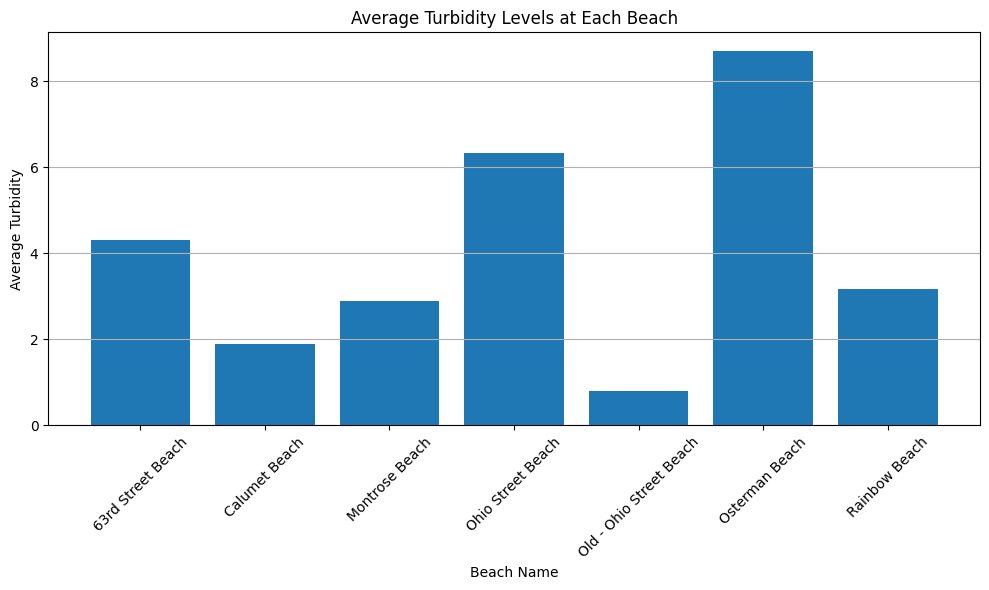

In [109]:
turbtime['Date'] = pd.to_datetime(turbtime['Date'])

# Group by beach name and calculate the average turbidity for each beach
grouped = turbtime.groupby('Beach Name').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped['Turbidity'])
plt.title('Average Turbidity Levels at Each Beach')
plt.xlabel('Beach Name')
plt.ylabel('Average Turbidity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

All of the Chicago Beaches have unique average turbidity levels. Old-Ohio Street Beach has the lowest average turbidity and Osterman Beach has the highest. Do these beaches have varying average wind speeds that could affect the turbidity levels?

Looking at average turbidity levels at each beach over the years

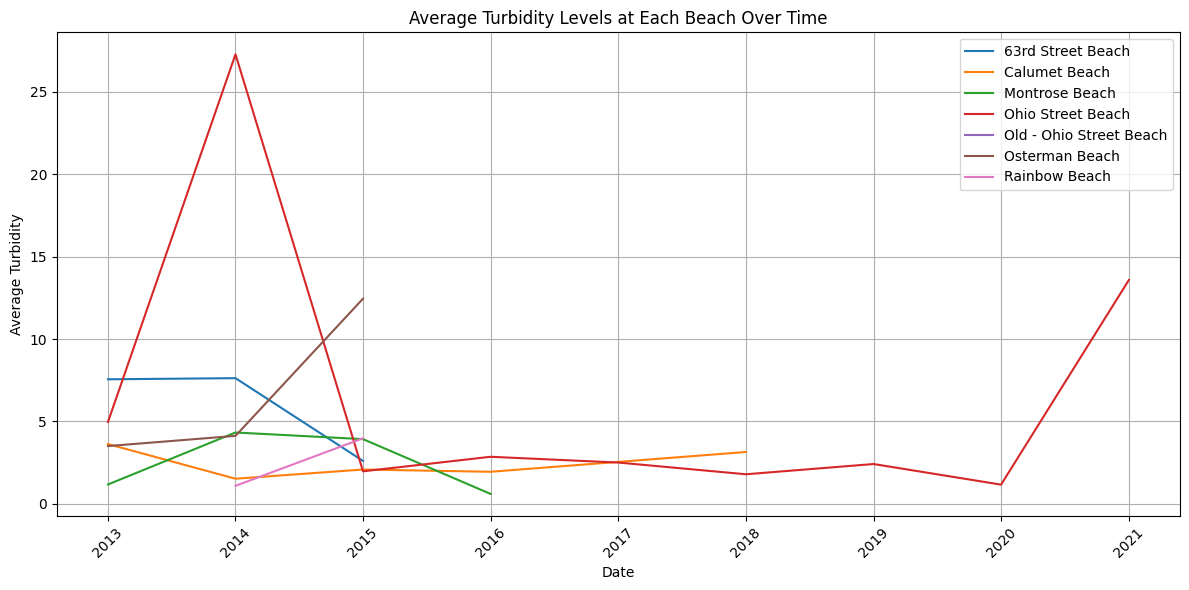

In [110]:
grouped = turbtime.groupby(['Beach Name', 'Date']).mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for beach, data in grouped.groupby('Beach Name'):
    plt.plot(data['Date'], data['Turbidity'], label=beach)

plt.title('Average Turbidity Levels at Each Beach Over Time')
plt.xlabel('Date')
plt.ylabel('Average Turbidity')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most beaches do not have recordings for every year in the dataset. The highs and lows of average turbidity do not align for each beach year to year. Why do some beaches have a rise in turbidity and other beaches have a decline in turbidity going from one year to the next?

Importing beach weather stations sensor csv file

In [84]:
import pandas as pd
import matplotlib.pyplot as plt


weather_prim = pd.read_csv('/content/Beach_Weather_Stations_-_Automated_Sensors_20240321.csv')


#making a copy of the original dataframe
weather = weather_prim.copy(deep='True')


#dropping unneccesary columns
weather = weather.drop(columns=['Station Name', 'Measurement Timestamp Label', 'Air Temperature',
       'Wet Bulb Temperature', 'Interval Rain', 'Precipitation Type',
                                'Wind Direction', 'Humidity', 'Rain Intensity',
       'Maximum Wind Speed', 'Barometric Pressure', 'Solar Radiation',
       'Heading', 'Battery Life', 'Total Rain',
       'Measurement ID'])

print(weather.head())



rows, cols = weather.shape
print("Number of rows:", rows)
print("Number of columns:", cols)




weather = weather.rename(columns = {"Measurement Timestamp" : "Date"})
#print(weather.head())

#removing any missing data
weather.dropna(inplace=True)

#weather['Date'] = weather['Date'].str[6:10]

#weather['Year'] = pd.to_datetime(weather['Year'])

print(weather.head())

#cleaned weather stations dataframe below

    Measurement Timestamp  Wind Speed
0  09/27/2018 10:00:00 AM         2.5
1  09/27/2018 11:00:00 AM         3.6
2  09/27/2018 01:00:00 PM         3.1
3  09/27/2018 01:00:00 PM         1.4
4  09/27/2018 03:00:00 PM         3.1
Number of rows: 168936
Number of columns: 2
                     Date  Wind Speed
0  09/27/2018 10:00:00 AM         2.5
1  09/27/2018 11:00:00 AM         3.6
2  09/27/2018 01:00:00 PM         3.1
3  09/27/2018 01:00:00 PM         1.4
4  09/27/2018 03:00:00 PM         3.1


Looking at the two new and cleaned dataframes

In [85]:
#now we have the cleaned dataframes, these we want to combine for further analysis
print(weather.head())
print(turbtime.head())


                     Date  Wind Speed
0  09/27/2018 10:00:00 AM         2.5
1  09/27/2018 11:00:00 AM         3.6
2  09/27/2018 01:00:00 PM         3.1
3  09/27/2018 01:00:00 PM         1.4
4  09/27/2018 03:00:00 PM         3.1
          Beach Name                    Date  Turbidity
0      Calumet Beach  04/07/2018 12:30:00 AM       3.15
1  Ohio Street Beach  06/14/2019 07:00:00 PM       2.18
2  Ohio Street Beach  05/16/2018 01:00:00 PM       1.92
3  Ohio Street Beach  05/16/2018 02:00:00 PM       1.81
4  Ohio Street Beach  06/04/2018 09:00:00 AM       0.03


Joining the dataframes based on Date

In [86]:
import pandas as pd

#joining the dataframes based on date, date becomes a common index and links the wind speed and turbidity on the same date and time

turbtime.set_index('Date', inplace=True)
weather.set_index('Date', inplace=True)

new = turbtime.join(weather, how = 'inner')
print(new)
print(new.describe())


                               Beach Name  Turbidity  Wind Speed
Date                                                            
05/15/2020 03:00:00 PM  Ohio Street Beach       0.37         1.7
05/15/2020 03:00:00 PM  Ohio Street Beach       0.37         1.5
05/15/2020 04:00:00 PM  Ohio Street Beach       0.36         2.3
05/15/2020 04:00:00 PM  Ohio Street Beach       0.36         2.0
05/15/2020 05:00:00 PM  Ohio Street Beach       0.32         1.6
...                                   ...        ...         ...
10/01/2015 06:00:00 AM      Rainbow Beach     357.35         7.5
10/01/2015 06:00:00 AM      Rainbow Beach     357.35         9.2
10/01/2015 06:00:00 AM      Rainbow Beach     357.35         7.4
10/01/2015 07:00:00 AM      Rainbow Beach       0.00         5.8
10/01/2015 07:00:00 AM      Rainbow Beach       0.00         9.0

[83028 rows x 3 columns]
          Turbidity    Wind Speed
count  83028.000000  83028.000000
mean       3.428751      2.193495
std       15.711370      1.

Plotting a box plot to understand where the data lies

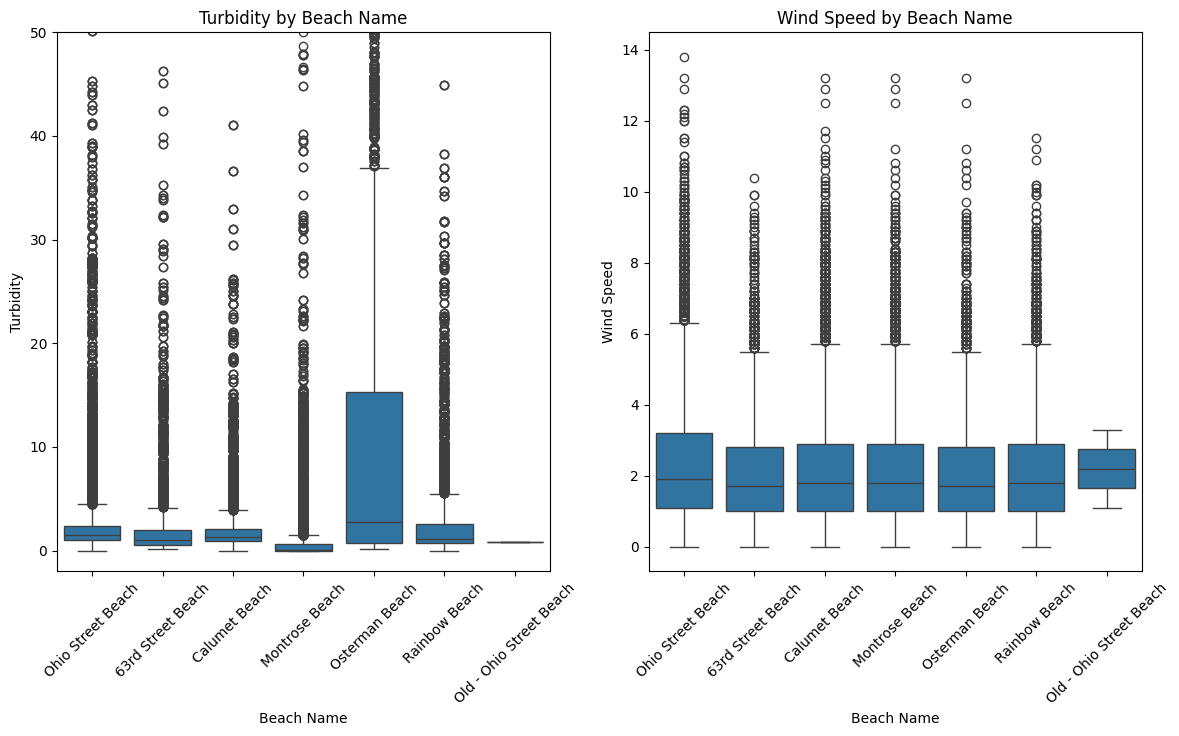

In [87]:
new['Turbidity'] = pd.to_numeric(new['Turbidity'])
new['Wind Speed'] = pd.to_numeric(new['Wind Speed'])

plt.figure(figsize=(14, 7))

# Box plot for turbidity
plt.subplot(1, 2, 1)
sns.boxplot(x='Beach Name', y='Turbidity', data=new)
plt.title('Turbidity by Beach Name')
plt.ylim(-2, 50)
plt.xticks(rotation=45)

# Box plot for wind speed
plt.subplot(1, 2, 2)
sns.boxplot(x='Beach Name', y='Wind Speed', data=new)
plt.title('Wind Speed by Beach Name')
plt.xticks(rotation=45)

# Show plot
plt.show()

Given the box plots, the averages for turbidity and wind speed are mostly level across all the beaches. There are MANY outliers for both turbidity and wind speed. Most of the data for turbidity lies between 0-3 NTU and 0-3 MPS for wind speed. Osterman Beach has a much higher 75% mark and Old-Ohio Street Beach has very little range/data compared to the rest of the beaches. As for wind speed, the ranges are very similar besides for Old-Ohio Street Beach. Again, Old-Ohio Street Beach seems to have less data recorded, therefore having a smaller range in values.

Creating a bar plot to see the average wind speed and average turbidity at each Chicago Beach

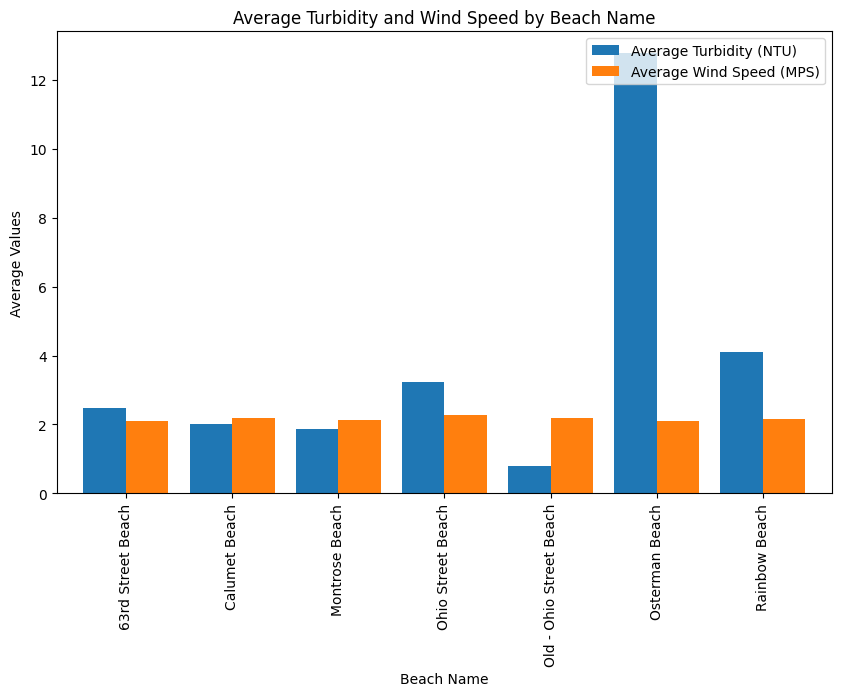

In [88]:
#turbidity and wind_speed are numeric
new['Turbidity'] = pd.to_numeric(new['Turbidity'])
new['Wind Speed'] = pd.to_numeric(new['Wind Speed'])

# Group by beach_name and calculate mean values
grouped_df = new.groupby('Beach Name').mean()


ax = grouped_df.plot(kind='bar', figsize=(10, 6), width=0.8)

ax.set_title('Average Turbidity and Wind Speed by Beach Name')
ax.set_xlabel('Beach Name')
ax.set_ylabel('Average Values')
ax.legend(['Average Turbidity (NTU)', 'Average Wind Speed (MPS)'], loc='upper right')

plt.show()

According to the bar plot, we see that the wind speed levels are extremely level across each Chicago Beach, and turbidity levels overall are steady across 63rd Street Beach, Calumet Beach, and Montrose Beach. The average turbidity levels at Ohio Street Beach and Rainnbow Beach are a bit higher. Old-Ohio Street beach has the lowest average turbidity and Osterman has the highest average turbidity. From this plot, we cannot spot a great pattern or correlation between average wind speed and average turbidity levels at each Chicago Beach.

Creating a correlation plot using seaborn to see the correlation trends between average turbidty and average wind speed

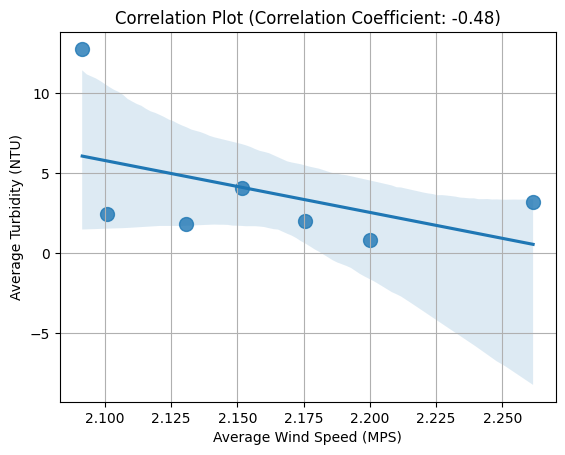

In [89]:
import seaborn as sns


average_values = new.groupby('Beach Name').mean()

# Calculate the correlation coefficient between average wind speed and average turbidity
correlation = average_values['Wind Speed'].corr(average_values['Turbidity'])

# Create a scatter plot with linear regression line
sns.regplot(x='Wind Speed', y='Turbidity', data=average_values, scatter_kws={'s': 100})
plt.title(f'Correlation Plot (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Average Wind Speed (MPS)')
plt.ylabel('Average Turbidity (NTU)')
plt.grid(True)
plt.show()

According to the correlation plot using seaborn, we can better visualize a correlation between average wind speed and average turbidity levels. This plot shows that average turbidity level is higher when average wind speed is lower with a correlation coefficient of -0.48. Higher average wind speed shows lower average turbidity levels.

Given the data and all of the visualizations created, the best interpretation we can see between average wind speed and average turbidity levels are shown in the correlation plot. The bar plot did not show significant trends between these two values. The correlation plot presents a better understanding of the relationship. This is interesting to see in the data because the correlation coefficient is -0.48. The plot implies that higher average wind speed shows lower average turbidity levels. This contradicts what I intially researched online that stated higher wind speed increases turbidity. Overall, it is difficult to distinguish a clear pattern between turbidity and wind speed levels given these two datasets.